In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\datasets\heart.csv")

In [3]:
df.shape

(1025, 14)

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.duplicated().any()

True

In [6]:
df=df.drop_duplicates()

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.tree import plot_tree

In [11]:
from sklearn.ensemble import BaggingClassifier

In [15]:
len(df.columns)

14

In [13]:
X=df.drop(columns='target')
y=df['target']

In [14]:
def ran_samp(df,perc):
    return df.sample(int(perc*df.shape[0]),replace=True)

In [61]:
def ran_features(df,perc):    
    index=np.random.randint(0,13,(int(perc*df.shape[1])))
    return df.iloc[:,index]

In [62]:
X=df.drop(columns='target')

In [63]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [64]:
y=df['target']

In [69]:
ran_features(X,0.8)

,restecg,chol,thalach,cp,fbs,trestbps,trestbps,trestbps,exang,cp
0,1,212,168,0,0,125,125,125,0,0
1,0,203,155,0,1,140,140,140,1,0
2,1,174,125,0,0,145,145,145,1,0
3,1,203,161,0,0,148,148,148,0,0
4,1,294,106,0,1,138,138,138,0,0
...,...,...,...,...,...,...,...,...,...,...
723,0,211,115,2,0,120,120,120,0,2
733,1,141,175,2,0,108,108,108,0,2
739,1,255,161,0,0,128,128,128,1,0
843,0,273,125,3,0,160,160,160,0,3


In [72]:
def combined_sampling(df,perc_row,perc_column):
    new_df=df.sample(int(perc_row*df.shape[0]),replace=True)
    index=np.random.randint(0,13,(int(perc_column*new_df.shape[1])))
    return new_df.iloc[:,index]

In [73]:
combined_sampling(X,0.2,0.8)

,age,cp,slope,cp,chol,thal,ca,thal,thalach,exang
190,41,2,2,2,250,2,0,2,179,0
56,56,3,1,3,193,3,0,3,162,0
106,51,0,2,0,299,3,0,3,173,1
652,66,3,0,3,226,2,0,2,114,0
334,60,0,1,0,206,3,2,3,132,1
148,52,3,1,3,298,3,0,3,178,0
131,51,2,2,2,256,2,0,2,149,0
191,56,1,2,1,221,3,0,3,163,0
438,47,2,2,2,253,2,0,2,179,0
231,56,1,2,1,236,2,0,2,178,0


In [74]:
#row based sampling

In [80]:
df1=ran_samp(df,0.4)
df2=ran_samp(df,0.4)
df3=ran_samp(df,0.4)

In [81]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
56,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
33,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
286,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1
183,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
366,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [82]:
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
288,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
228,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
24,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
691,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
74,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
193,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [83]:
df3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
720,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
536,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
234,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1
119,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
114,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
95,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1


In [84]:
dt1=DecisionTreeClassifier()
dt2=DecisionTreeClassifier()
dt3=DecisionTreeClassifier()

In [87]:
dt1.fit(df1.drop(columns='target'),df1['target'])

DecisionTreeClassifier()

In [88]:
dt2.fit(df2.drop(columns='target'),df2['target'])

DecisionTreeClassifier()

In [89]:
dt3.fit(df3.drop(columns='target'),df3['target'])

DecisionTreeClassifier()

In [93]:
np.array(df.drop(columns='target').sample(1))

array([[ 59.,   1.,   1., 140., 221.,   0.,   1., 164.,   1.,   0.,   2.,
          0.,   2.]])

In [104]:
l=[]
l.append(dt1.predict(np.array(df.drop(columns='target').sample(1)))[0])

G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [105]:
l.append(dt2.predict(np.array(df.drop(columns='target').sample(1)))[0])

G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [106]:
l.append(dt3.predict(np.array(df.drop(columns='target').sample(1)))[0])

G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [107]:
l

[0, 1, 1]

In [108]:
from collections import Counter

In [111]:
Counter(l)

Counter({0: 1, 1: 2})

In [112]:
df4=ran_features(X,0.4)
df5=ran_features(X,0.4)
df6=ran_features(X,0.4)

In [113]:
df4

,slope,fbs,thalach,restecg,thalach
0,2,0,168,1,168
1,0,1,155,0,155
2,0,0,125,1,125
3,2,0,161,1,161
4,1,1,106,1,106
...,...,...,...,...,...
723,1,0,115,0,115
733,1,0,175,1,175
739,2,0,161,1,161
843,2,0,125,0,125


In [114]:
df5

,oldpeak,exang,oldpeak,oldpeak,chol
0,1.0,0,1.0,1.0,212
1,3.1,1,3.1,3.1,203
2,2.6,1,2.6,2.6,174
3,0.0,0,0.0,0.0,203
4,1.9,0,1.9,1.9,294
...,...,...,...,...,...
723,1.5,0,1.5,1.5,211
733,0.6,0,0.6,0.6,141
739,0.0,1,0.0,0.0,255
843,0.0,0,0.0,0.0,273


In [115]:
df6

,cp,thalach,oldpeak,ca,sex
0,0,168,1.0,2,1
1,0,155,3.1,0,1
2,0,125,2.6,0,1
3,0,161,0.0,1,1
4,0,106,1.9,3,0
...,...,...,...,...,...
723,2,115,1.5,0,0
733,2,175,0.6,0,0
739,0,161,0.0,1,1
843,3,125,0.0,0,1


In [116]:
dt4=DecisionTreeClassifier()
dt5=DecisionTreeClassifier()
dt6=DecisionTreeClassifier()

In [117]:
dt4.fit(df4,y)

DecisionTreeClassifier()

In [118]:
dt5.fit(df5,y)

DecisionTreeClassifier()

In [119]:
dt6.fit(df6,y)

DecisionTreeClassifier()

In [121]:
dt4.predict(df4.sample(1))

array([0], dtype=int64)

[Text(0.5673076923076923, 0.9285714285714286, 'x[2] <= 0.5\ngini = 0.499\nsamples = 120\nvalue = [57, 63]'),
 Text(0.3269230769230769, 0.7857142857142857, 'x[11] <= 0.5\ngini = 0.362\nsamples = 59\nvalue = [45, 14]'),
 Text(0.19230769230769232, 0.6428571428571429, 'x[12] <= 2.5\ngini = 0.499\nsamples = 27\nvalue = [14, 13]'),
 Text(0.11538461538461539, 0.5, 'x[3] <= 145.0\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.07692307692307693, 0.35714285714285715, 'x[5] <= 0.5\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.038461538461538464, 0.21428571428571427, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.11538461538461539, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15384615384615385, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2692307692307692, 0.5, 'x[4] <= 254.0\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.23076923076923078, 0.35714285714285715, 'x[9] <= 0.85\ngini = 0.5\nsamples = 6\nvalue = 

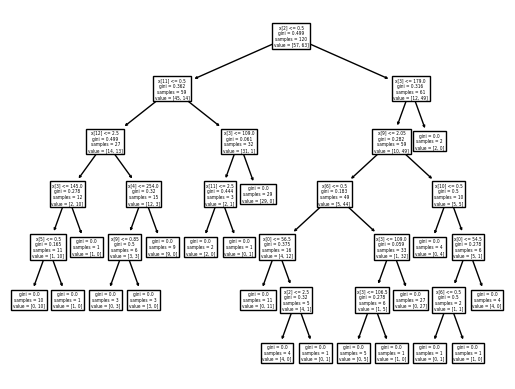

In [123]:
plot_tree(dt1)

[Text(0.5113636363636364, 0.9285714285714286, 'x[2] <= 0.5\ngini = 0.5\nsamples = 120\nvalue = [59, 61]'),
 Text(0.2727272727272727, 0.7857142857142857, 'x[12] <= 2.5\ngini = 0.35\nsamples = 53\nvalue = [41, 12]'),
 Text(0.22727272727272727, 0.6428571428571429, 'x[11] <= 0.5\ngini = 0.494\nsamples = 27\nvalue = [15, 12]'),
 Text(0.09090909090909091, 0.5, 'x[8] <= 0.5\ngini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(0.045454545454545456, 0.35714285714285715, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.13636363636363635, 0.35714285714285715, 'x[12] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.09090909090909091, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.18181818181818182, 0.21428571428571427, 'x[10] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.13636363636363635, 0.07142857142857142, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.22727272727272727, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')

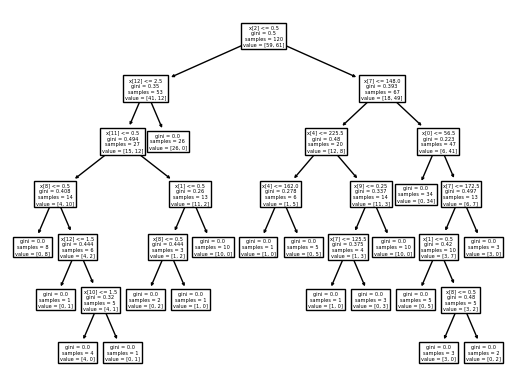

In [125]:
plot_tree(dt2)

[Text(0.4479166666666667, 0.9375, 'x[2] <= 0.5\ngini = 0.497\nsamples = 120\nvalue = [55, 65]'),
 Text(0.22916666666666666, 0.8125, 'x[9] <= 0.1\ngini = 0.358\nsamples = 60\nvalue = [46, 14]'),
 Text(0.125, 0.6875, 'x[1] <= 0.5\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.08333333333333333, 0.5625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.16666666666666666, 0.5625, 'x[7] <= 181.5\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.125, 0.4375, 'x[4] <= 215.0\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.08333333333333333, 0.3125, 'x[11] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.041666666666666664, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.125, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.16666666666666666, 0.3125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.20833333333333334, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.6875, 'x[3] <= 106.0\ngini = 0.198\nsamples

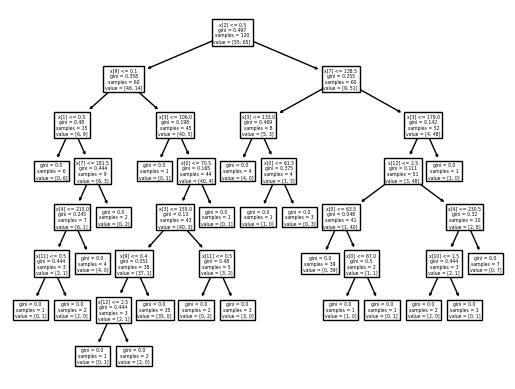

In [126]:
plot_tree(dt3)

[Text(0.4785907451923077, 0.96875, 'x[2] <= 147.5\ngini = 0.496\nsamples = 302\nvalue = [138, 164]'),
 Text(0.25570913461538464, 0.90625, 'x[0] <= 1.5\ngini = 0.419\nsamples = 127\nvalue = [89, 38]'),
 Text(0.08834134615384616, 0.84375, 'x[4] <= 113.5\ngini = 0.332\nsamples = 100\nvalue = [79, 21]'),
 Text(0.019230769230769232, 0.78125, 'x[3] <= 0.5\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.009615384615384616, 0.71875, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.028846153846153848, 0.71875, 'x[4] <= 102.0\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.019230769230769232, 0.65625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.038461538461538464, 0.65625, 'x[4] <= 105.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.028846153846153848, 0.59375, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.04807692307692308, 0.59375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.15745192307692307, 0.78125, 'x[4] <= 122.5\ngini = 0.378\nsamples = 7

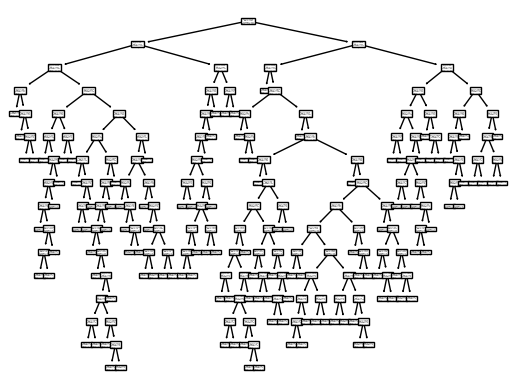

In [127]:
plot_tree(dt4)

[Text(0.6474609375, 0.9705882352941176, 'x[1] <= 0.5\ngini = 0.496\nsamples = 302\nvalue = [138, 164]'),
 Text(0.45796535326086957, 0.9117647058823529, 'x[0] <= 1.95\ngini = 0.424\nsamples = 203\nvalue = [62, 141]'),
 Text(0.31538722826086957, 0.8529411764705882, 'x[2] <= 0.75\ngini = 0.369\nsamples = 176\nvalue = [43, 133]'),
 Text(0.17425271739130435, 0.7941176470588235, 'x[4] <= 228.0\ngini = 0.312\nsamples = 119\nvalue = [23, 96]'),
 Text(0.059782608695652176, 0.7352941176470589, 'x[3] <= 0.05\ngini = 0.145\nsamples = 51\nvalue = [4, 47]'),
 Text(0.04891304347826087, 0.6764705882352942, 'x[4] <= 173.5\ngini = 0.193\nsamples = 37\nvalue = [4, 33]'),
 Text(0.021739130434782608, 0.6176470588235294, 'x[4] <= 166.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.010869565217391304, 0.5588235294117647, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.03260869565217391, 0.5588235294117647, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07608695652173914, 0.6176470588235294, 

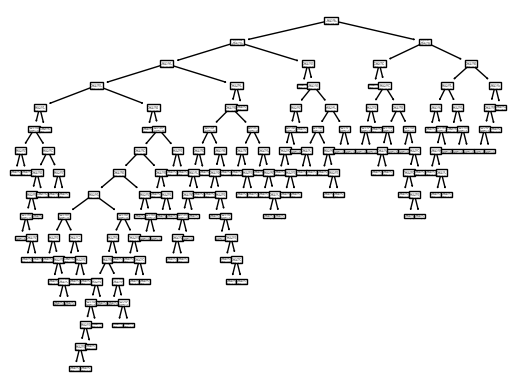

In [128]:
plot_tree(dt5)

[Text(0.5153125, 0.9583333333333334, 'x[0] <= 0.5\ngini = 0.496\nsamples = 302\nvalue = [138, 164]'),
 Text(0.25, 0.875, 'x[3] <= 0.5\ngini = 0.397\nsamples = 143\nvalue = [104, 39]'),
 Text(0.16666666666666666, 0.7916666666666666, 'x[2] <= 0.7\ngini = 0.499\nsamples = 65\nvalue = [31, 34]'),
 Text(0.12, 0.7083333333333334, 'x[1] <= 181.5\ngini = 0.375\nsamples = 32\nvalue = [8, 24]'),
 Text(0.10666666666666667, 0.625, 'x[1] <= 164.5\ngini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(0.08, 0.5416666666666666, 'x[2] <= 0.3\ngini = 0.34\nsamples = 23\nvalue = [5, 18]'),
 Text(0.06666666666666667, 0.4583333333333333, 'x[1] <= 158.5\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(0.05333333333333334, 0.375, 'x[1] <= 155.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.04, 0.2916666666666667, 'x[1] <= 147.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.02666666666666667, 0.20833333333333334, 'x[4] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.01333333333

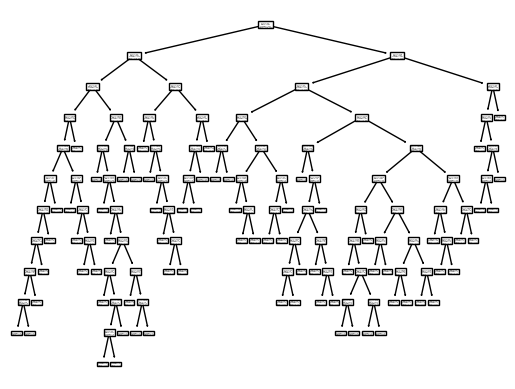

In [129]:
plot_tree(dt6)